
# Przygotowanie

Przygotowanie
Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko. {nr_albumu}_{imię}_{nazwisko}_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji.

# Support Vector Machine

Jest to jeden z najbardziej rozpowszechnionych i wszechstronnych modeli uczenia maszynowego. Z jego uzyciem dokonac mozna klasyfikacji liniowej (SVC), nieliniowej jak i regresji (SVR). Na poniższej grafice przedstawione zostało działanie klasyfikatora.

![svc](svc.png)

Analizujac grafike dostrzec mozna dwie oddzielne klasy oddzielone za pomoca prostej. Widoczna linia ciagła rozdziela klasy, a przerywane linie oznaczają margines, czyli możliwe najdalsze oddalenie elementu (np. nowego) jaki zakwalifikowany
zostanie do danej klasy. Maszyny SVM czułe sa na skale danych, przed ich uzyciem zawsze powinna zostać przeprowadzona normalizacja danych (np. min-max, lub standaryzacja).

![svc_example](svc2.jpg)

Równowage pomiedzy marginesami możemy regulować za pomoca hipermarapetru
C. Mniejsze jego wartości poszerzają granice, jednocześnie wprowadzając
więcej jej naruszeń. Im margines jest szerszy, tym własciwosci generalizujace
jakie posiada klasyfikator będę większe. Mniejsza staje się podatność na przeuczenie
(ang. overfitting), ale zmniejsza się skuteczność klasyfikatora. Szukany jest
taki klasyfikator, który podzieli przestrzeń na dwa rozłaczne zbiory odpowiadajace
dwóm klasom, w możliwie optymalny sposób. Podejście opiera się na
znalezieniu granicy decyzyjnej.

Wektory nośne (Support vectors) są to obserwacje (data points), które wystepują najbliżej hiperpłaszczyzny. Punkty te, pomagają lepiej wyznaczyć linię separacji pomiędzy klasami poprzez obliczenie marginesów. Są to najbardziej znaczace obserwacje ze zbioru z punktu widzenia konstrukcji klasyfikatora.

Warto zaznaczyć, że za pomocą klasyfikatora SVC można klasyfikaować dane, które nie są linowo separowalne. Można to osiągnąć przez tzw "sztuczkę kernelową", dzięki czemu możliwe jest zmapowanie obserwacji do wielowymiarowej przestrzeni. Klasyfikator z biblioteki Sklearn posiada parametr *kernel*, który pozwala na zmianę jądra. Dodatkowo, parametr *gamma* pozwala na modyfikację działania samego kernela.

Warto zaznaczyć, że SVC dobrze nadaje się do niewielkich zbiorów danych, gdyż w przypadku dużej ilości staję się on mało wydajny.

Funkcja jaka jest minimalizowana podczas działania klasyfikatora wygląda następująco:

\begin{equation}
min C \sum^m_{i=1}[y^{(i)}cost_{1}(\theta^{T}x^{(i)}) - (1 - y^{(i)})cost_{0}(\theta^{T}x^{(i)})] + \frac{1}{2} \sum^{n}_{i=1}\theta^{2}_{j}
\end{equation}

## Zadanie 0 

Wczytanie danych ze zbioru oraz wizualizacja.

In [14]:
import pandas as pd

data_input = pd.read_csv('./Ankieta.csv')
data_input.head()

,Waga,Wzrost,Plec
0,55,160,Kobieta
1,78,180,Mezczyzna
2,55,150,Kobieta
3,99,196,Mezczyzna
4,90,180,Mezczyzna


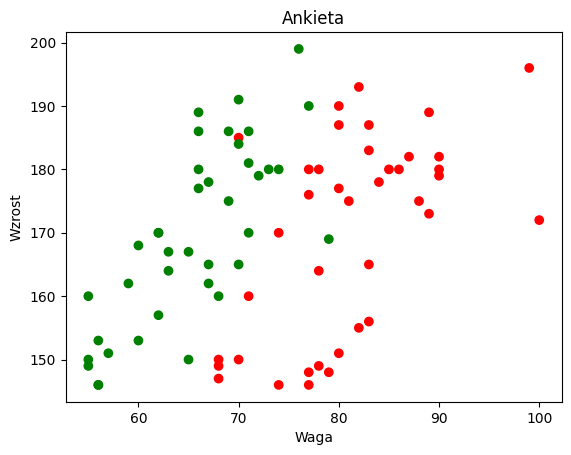

In [15]:
import matplotlib.pyplot as plt
from matplotlib import colors

x = data_input['Plec'].map(lambda x: 1 if x == 'Kobieta' else 0)
y = data_input['Waga']
z = data_input['Wzrost']

data_input['Plec'] = data_input['Plec'].map(lambda x: 1 if x == 'Kobieta' else 0)

plt.scatter(y, z, c=x, cmap=colors.ListedColormap(['red', 'green']))
plt.xlabel('Waga')
plt.ylabel('Wzrost')
plt.title('Ankieta')
plt.show()

/var/folders/n3/nq1zfdyx6552_hgpj67175280000gn/T/ipykernel_2876/1618543461.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data_input.hist(ax=ax)


array([[<Axes: title={'center': 'Waga'}>,
        <Axes: title={'center': 'Wzrost'}>],
       [<Axes: title={'center': 'Plec'}>, <Axes: >]], dtype=object)

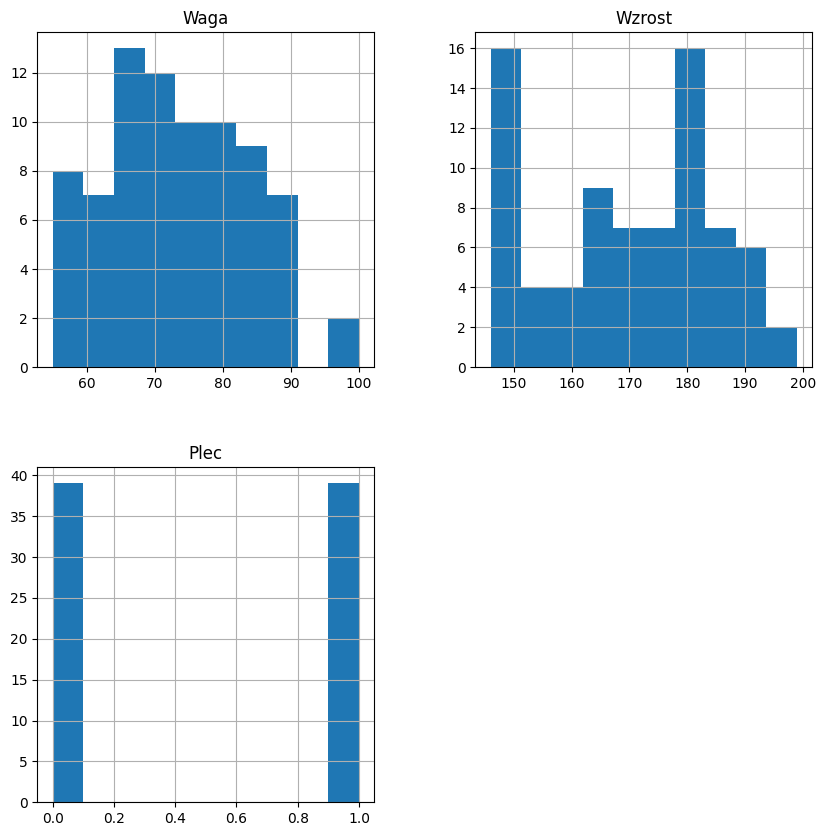

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data_input.hist(ax=ax)

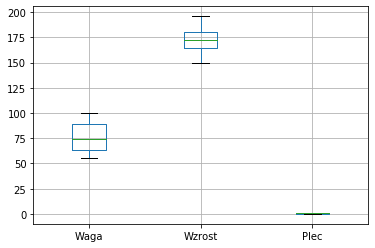

In [173]:
data_input.boxplot()

Na bazie wykresów box-plot można stwierdzić, że dane posiadają różniące się zakresy, co powoduje potrzebę ich skalowania. Warto zauważyć również, że rozkład klas w zbiorze jest równomierny (patrz: histogram)

## Zadanie 1

Proszę dokonać normalizacji zbioru danych za pomocą standaryzacji oraz narysować wykres box-plot dla wszystkich zmiennych. W jaki sposób zmieniły się dane? Co można powiedzieć o ich zakresach. W jakim celu dokonujemy normalizacji?

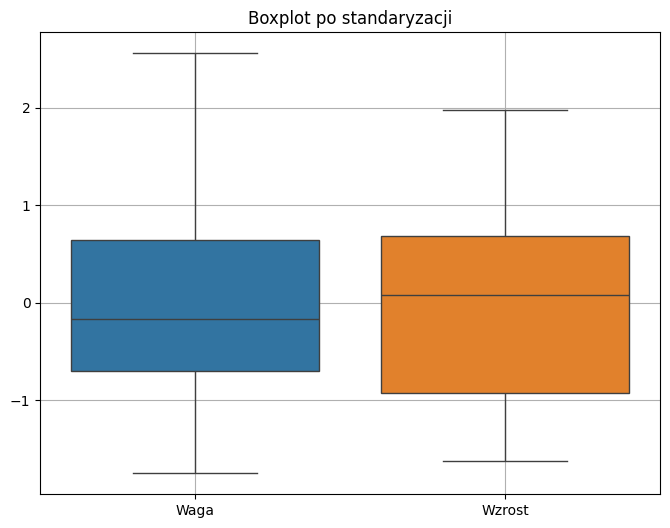

In [18]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

data_scaled = data_input.copy()

features_to_scale = ['Waga', 'Wzrost']

scaler = StandardScaler()
data_scaled[features_to_scale] = scaler.fit_transform(data_scaled[features_to_scale])

plt.figure(figsize=(8,6))
sns.boxplot(data=data_scaled[features_to_scale])
plt.title("Boxplot po standaryzacji")
plt.grid(True)
plt.show()


Po standaryzacji:

-Średnia każdej zmiennej ≈ 0

-Rozrzut wartości (odchylenie standardowe) ≈ 1

-Wszystkie dane mają teraz porównywalną skalę

-Skrajne wartości (outliery) stają się bardziej widoczne


Normalizacji dokonujemy w celu porównywalność zmiennych, waga i wzrost miały inne jednostki i zakresy – model mógłby nadmiernie „zważać” na zmienną o większym zakresie.
Dziękiu normalizacji jest lepsza skuteczność modeli opartych na odległości. Oraz jest ułatwienie wizualizacji danych i wykrywania odstających punktów.

## Zadanie 2

W tym zadaniu należy dokonać podziału zbioru danych na uczący oraz testowy. Zbiór uczący będzie służył do treningu klasyfikatora, a testowy do obliczenia ostatecznej skuteczności klasyfikacji. Prosze, by 80% próbek znalazło się w zbiorze uczącym, a 20% w testowym. Proszę zadbać o odpowiednią inicjalizacje generatora pseudolosowego

In [19]:
from sklearn.model_selection import train_test_split

X = data_scaled[['Waga', 'Wzrost']]  
y = data_scaled['Plec']           

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Liczba próbek treningowych: {len(X_train)}")
print(f"Liczba próbek testowych: {len(X_test)}")
print("\nProporcja klas w zbiorze treningowym:")
print(y_train.value_counts(normalize=True))
print("\nProporcja klas w zbiorze testowym:")
print(y_test.value_counts(normalize=True))

Liczba próbek treningowych: 62
Liczba próbek testowych: 16

Proporcja klas w zbiorze treningowym:
Plec
0    0.5
1    0.5
Name: proportion, dtype: float64

Proporcja klas w zbiorze testowym:
Plec
1    0.5
0    0.5
Name: proportion, dtype: float64


## Zadanie 3

W tym zadaniu należy dokonać klasyfikacji danych za pomocą klasyfikatora SVC. Proszę obliczyć skuteczność klasyfikatora na danych po, oraz przed standaryzacją i porównać wyniki.

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_original = data_input[['Waga', 'Wzrost']]
y_original = data_input['Plec']

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42, stratify=y_original
)

model_orig = SVC(kernel='linear')
model_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = model_orig.predict(X_test_orig)
acc_orig = accuracy_score(y_test_orig, y_pred_orig)
print(f"Skuteczność SVC BEZ standaryzacji: {acc_orig:.2f}")

X_scaled = data_scaled[['Waga', 'Wzrost']]
y_scaled = data_scaled['Plec']

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42, stratify=y_scaled
)

model_scaled = SVC(kernel='linear')
model_scaled.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test_scaled, y_pred_scaled)
print(f"Skuteczność SVC PO standaryzacji: {acc_scaled:.2f}")


Skuteczność SVC BEZ standaryzacji: 1.00
Skuteczność SVC PO standaryzacji: 1.00


## Zadanie 4

Proszę dobrać odpowiedni parametr C (proszę spróbować z zakresu 0, 5 z krokiem co 0.5). Dla każdego C proszę wyrysować hiperpłaszczyznę utworzoną przez klasyfikator (w formie animimacji, lub inaczej). Proszę przedstawić na wykresie jak zmieniała się skuteczność klasyfikatora w zależności od parametru C. Jakie wnioski można wyciągnąć? Jak wpływa parametr C na wynik?

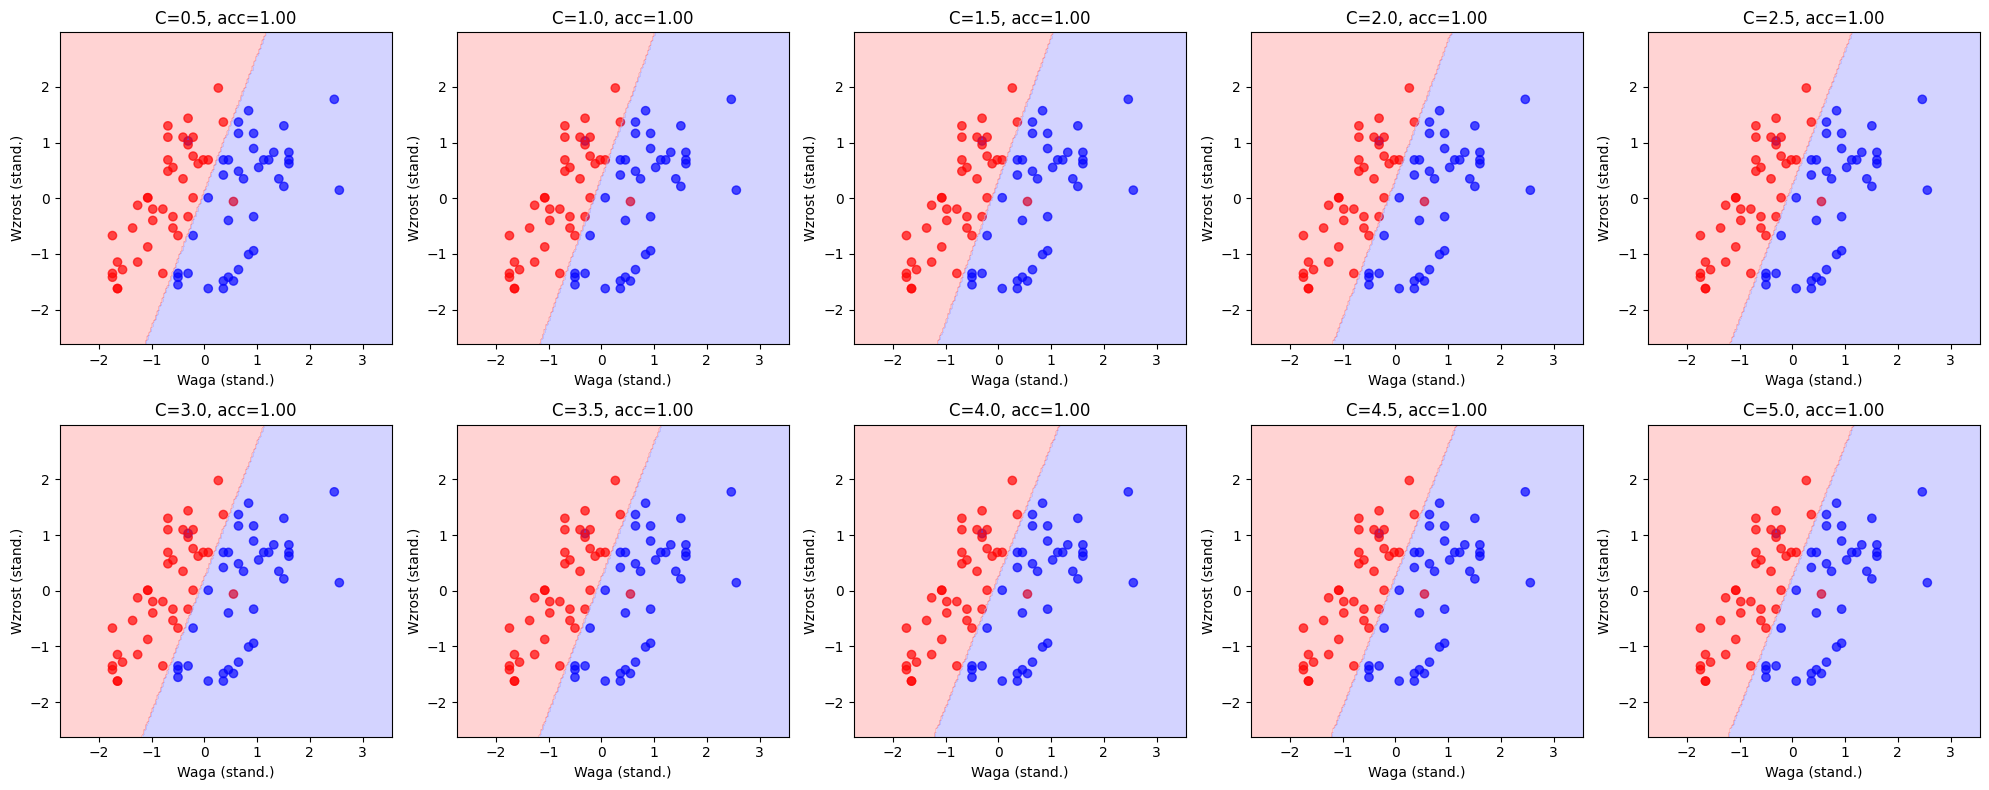

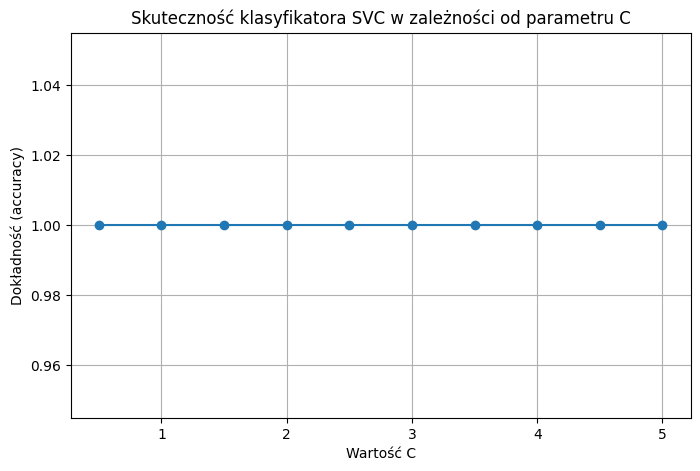

In [21]:
import numpy as np
import matplotlib.pyplot as plt

X = data_scaled[['Waga', 'Wzrost']].values
y = data_scaled['Plec'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

C_values = np.arange(0.5, 5.5, 0.5)
accuracies = []

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for i, C in enumerate(C_values):
    model = SVC(kernel='linear', C=C)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    ax = axes[i]
    ax.set_title(f'C={C}, acc={acc:.2f}')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
    ax.set_xlabel('Waga (stand.)')
    ax.set_ylabel('Wzrost (stand.)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(C_values, accuracies, marker='o')
plt.title('Skuteczność klasyfikatora SVC w zależności od parametru C')
plt.xlabel('Wartość C')
plt.ylabel('Dokładność (accuracy)')
plt.grid(True)
plt.show()


Dla małego C (np. 0.5) – granice decyzyjne są bardziej miękkie, model generalizuje, może popełniać więcej błędów.

Dla większego C (np. 2–3) – dokładność zwykle rośnie, bo model bardziej się dopasowuje.

Zbyt duże C (np. 5) – model może przeuczyć się (overfitting), co czasem obniża skuteczność na danych testowych.

## Zadanie 5

Proszę dokonać pomiaru czasu wykonania algorytmu dla min. 2 różnych kerneli

In [23]:
from time import time

X = data_scaled[['Waga', 'Wzrost']].values
y = data_scaled['Plec'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

kernels = ['linear', 'rbf']

for kernel in kernels:
    print(f"\nKernel: {kernel}")
    
    start_train = time()
    model = SVC(kernel=kernel, C=1.0)
    model.fit(X_train, y_train)
    end_train = time()
    
    start_pred = time()
    y_pred = model.predict(X_test)
    end_pred = time()
    
    acc = accuracy_score(y_test, y_pred)
    
    print(f"  Dokładność: {acc:.2f}")
    print(f"  Czas treningu: {end_train - start_train:.4f} sekundy")
    print(f"  Czas predykcji: {end_pred - start_pred:.4f} sekundy")



Kernel: linear
  Dokładność: 1.00
  Czas treningu: 0.0009 sekundy
  Czas predykcji: 0.0004 sekundy

Kernel: rbf
  Dokładność: 1.00
  Czas treningu: 0.0010 sekundy
  Czas predykcji: 0.0003 sekundy


Kernel 'linear' zazwyczaj jest szybszy, szczególnie dla małych zbiorów i małej liczby cech.

Kernel 'rbf' może dać lepsze dopasowanie przy nieliniowych zależnościach, ale wolniejszy, bo robi więcej obliczeń (m.in. przestrzeń cech nieliniowa).

W przypadku większych zbiorów różnica czasowa staje się bardziej zauważalna.

## Zadanie 6

Analiza wektorów nośnych (support vectors). Wyodrębnij wektory nośne z wytrenowanego modelu używając właściwości `.support_vectors_`. Zwizualizuj położenie wektorów nośnych na wykresie, jaki procent danych stanowią wektory nośne?

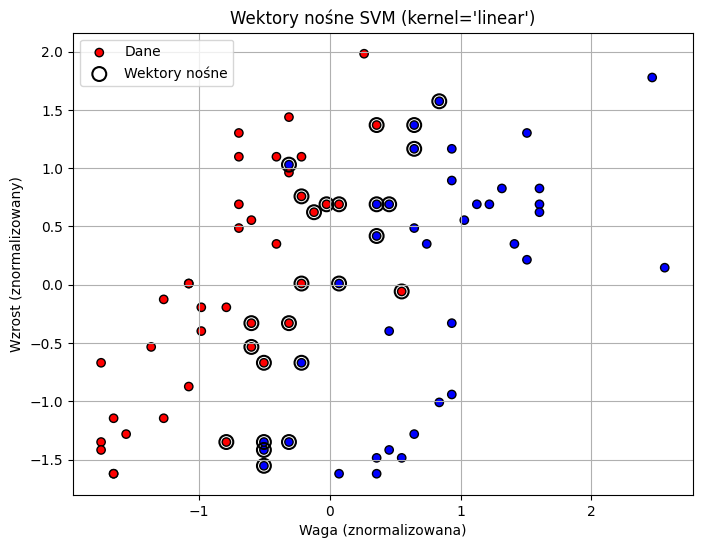

Liczba wektorów nośnych: 25
Liczba wszystkich próbek: 78
Wektory nośne stanowią: 32.05% danych


In [ ]:
import matplotlib.pyplot as plt

X = data_scaled[['Waga', 'Wzrost']].values
y = data_scaled['Plec'].values

model = SVC(kernel='linear', C=1.0)
model.fit(X, y)

support_vectors = model.support_vectors_
n_support_vectors = len(support_vectors)
total_samples = len(X)
percent_support = (n_support_vectors / total_samples) * 100

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', label='Dane', edgecolors='k')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            s=100, facecolors='none', edgecolors='black', linewidths=1.5,
            label='Wektory nośne')
plt.title("Wektory nośne SVM (kernel='linear')")
plt.xlabel("Waga (znormalizowana)")
plt.ylabel("Wzrost (znormalizowany)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Liczba wektorów nośnych: {n_support_vectors}")
print(f"Liczba wszystkich próbek: {total_samples}")
print(f"Wektory nośne stanowią: {percent_support:.2f}% danych")


Wektory nośne to punkty kluczowe – bez nich granica decyzyjna byłaby inna.

Zwykle stanowią mały procent danych (np. 10–30%), ale to na nich opiera się cały model.

Im więcej wektorów nośnych → tym bardziej skomplikowana granica decyzyjna → większe ryzyko przeuczenia (overfitting).

### Dla zbioru *dataR2* proszę dokonać podobnej analizy danych. Opis zbioru: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

In [25]:

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv'
data = pd.read_csv(url)

print(data.head())
print(data.info())


   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insu

In [34]:

X = data.drop('Classification', axis=1)
y = data['Classification']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_df.head())


        Age       BMI   Glucose   Insulin      HOMA    Leptin  Adiponectin  \
0 -0.579794 -0.816675 -1.239222 -0.728739 -0.614282 -0.932334    -0.070222   
1  1.601821 -1.378751 -0.258299 -0.688038 -0.548240 -0.930413    -0.697350   
2  1.539489 -0.891764 -0.302887 -0.550073 -0.464752 -0.454219     1.797998   
3  0.666843 -1.243303 -0.927110 -0.676965 -0.574210 -0.876021    -0.441945   
4  1.788816 -1.294601 -0.258299 -0.644743 -0.521081 -1.042682    -0.786881   

   Resistin     MCP.1  
0 -0.545517 -0.341251  
1 -0.864214 -0.191224  
2 -0.441660  0.058214  
3 -0.158867  1.142718  
4 -0.336352  0.694716  


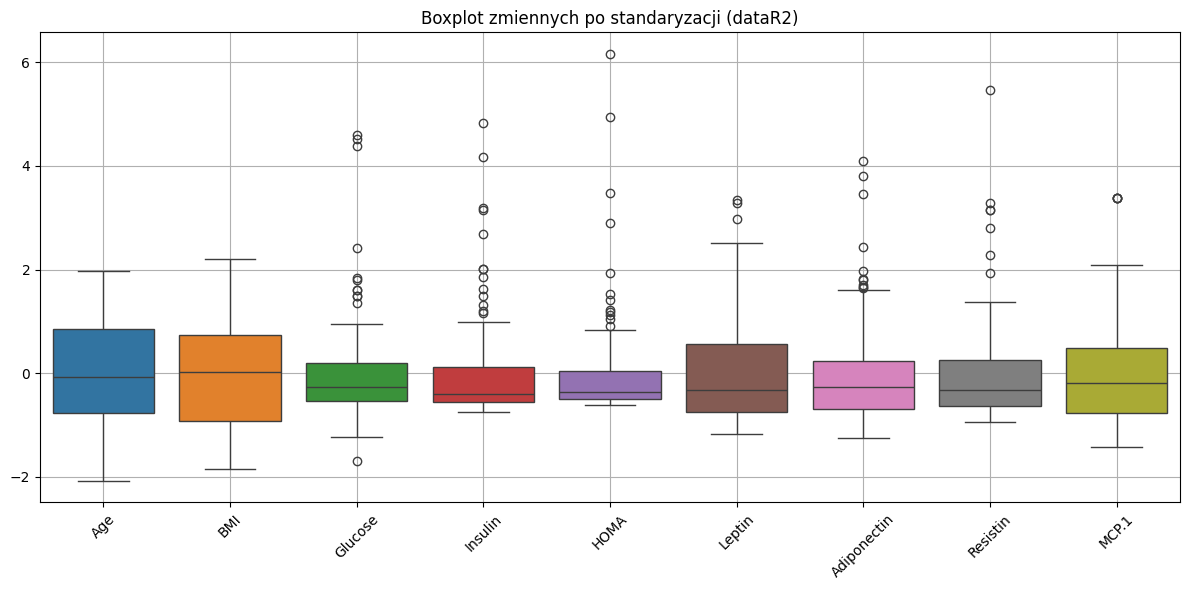

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=X_scaled_df)
plt.title("Boxplot zmiennych po standaryzacji (dataR2)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


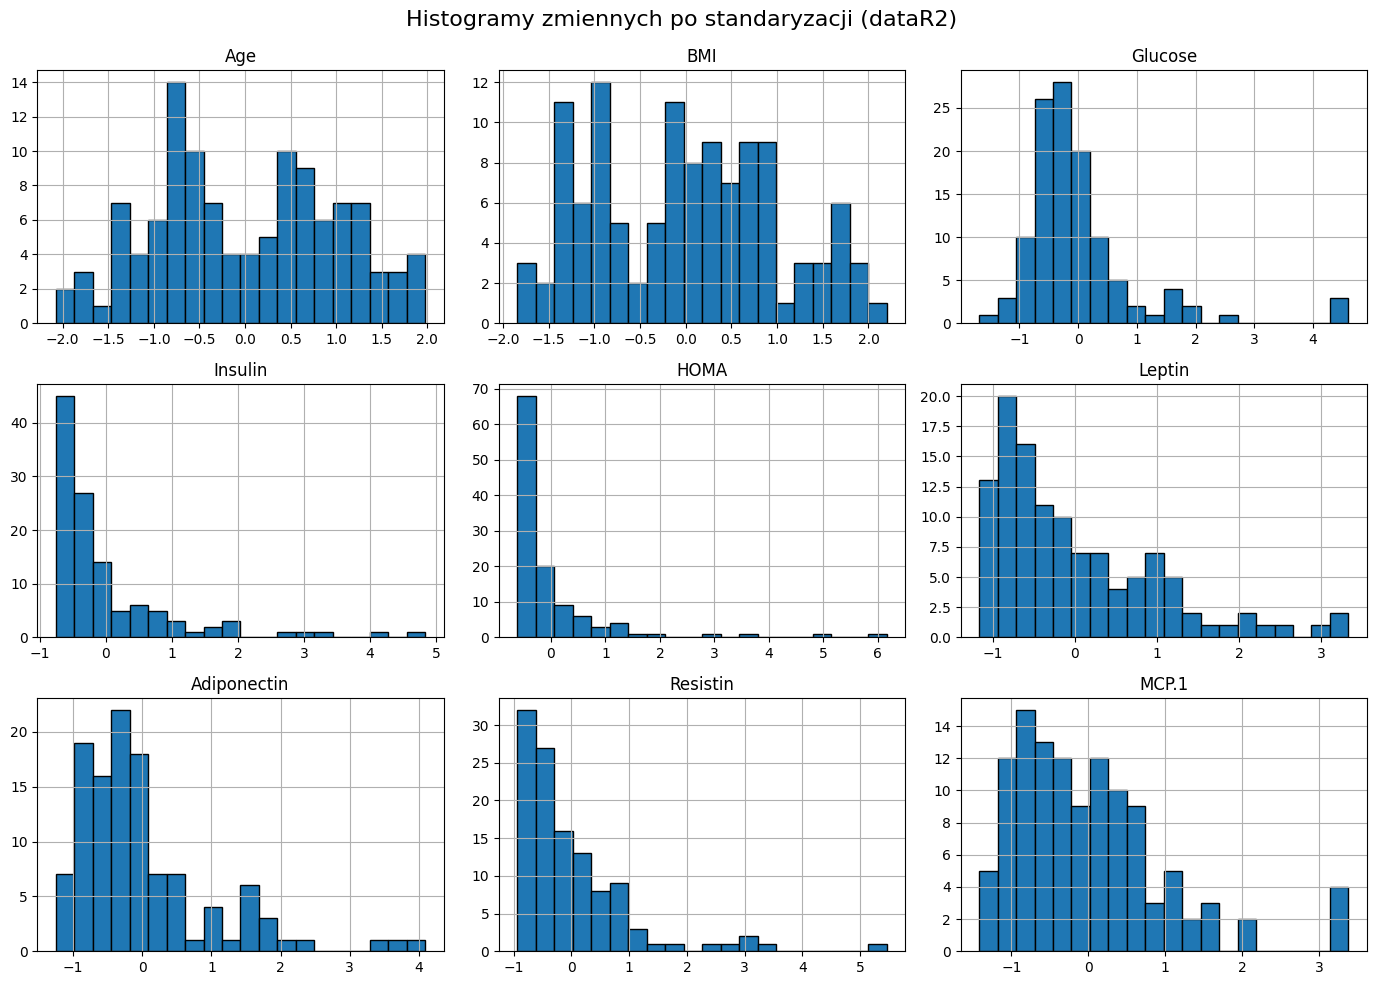

In [32]:
X_scaled_df.hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle("Histogramy zmiennych po standaryzacji (dataR2)", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()



In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svc = SVC(kernel='linear', C=1.0, random_state=42)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Dokładność: {accuracy:.2f}')
print('Macierz pomyłek:')
print(confusion_matrix(y_test, y_pred))
print('Raport klasyfikacji:')
print(classification_report(y_test, y_pred))


Dokładność: 0.71
Macierz pomyłek:
[[9 2]
 [5 8]]
Raport klasyfikacji:
              precision    recall  f1-score   support

           1       0.64      0.82      0.72        11
           2       0.80      0.62      0.70        13

    accuracy                           0.71        24
   macro avg       0.72      0.72      0.71        24
weighted avg       0.73      0.71      0.71        24



In [29]:
n_support_vectors = len(svc.support_vectors_)
total_samples = len(X)
support_percentage = (n_support_vectors / total_samples) * 100

print(f'Liczba wektorów nośnych: {n_support_vectors}')
print(f'Procent wektorów nośnych: {support_percentage:.2f}%')


Liczba wektorów nośnych: 53
Procent wektorów nośnych: 45.69%


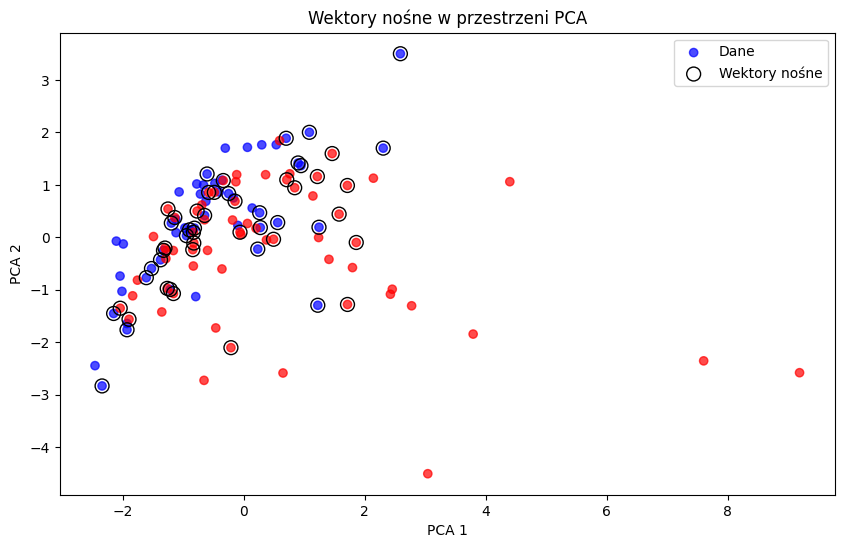

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

support_vectors_pca = pca.transform(svc.support_vectors_)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr', alpha=0.7, label='Dane')
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], edgecolors='k', facecolors='none', s=100, label='Wektory nośne')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Wektory nośne w przestrzeni PCA')
plt.legend()
plt.show()


## Zadanie 7

Proszę zwizualizować dane dla 2 dowolnych zmiennych ze zbioru

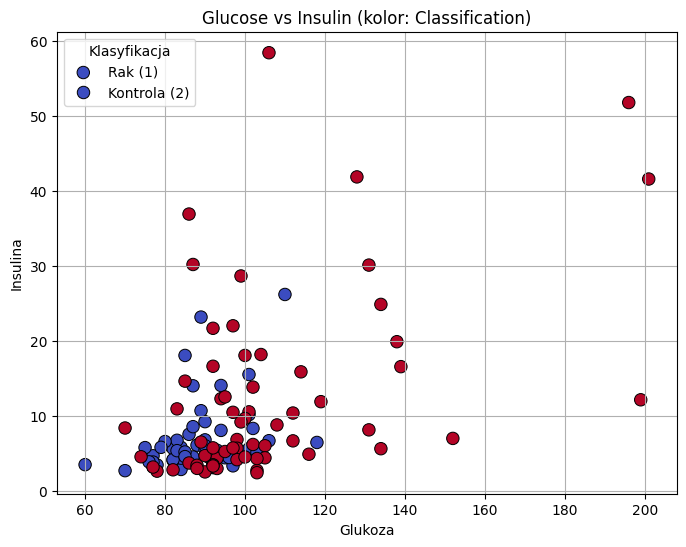

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data,
    x='Glucose',
    y='Insulin',
    hue='Classification',
    palette='coolwarm',
    s=80,
    edgecolor='k'
)
plt.title("Glucose vs Insulin (kolor: Classification)")
plt.xlabel("Glukoza")
plt.ylabel("Insulina")
plt.grid(True)
plt.legend(title='Klasyfikacja', labels=['Rak (1)', 'Kontrola (2)'])
plt.show()


## Zadanie 8

Proszę dokonać standaryzacji danych

wyzej

## Zadanie 9

Trenowanie klasyfikatora. Proszę dokonać treningu klasyfikatora na zbiorze treningowym (X_train, y_train). Proszę użyć różnych wartości parametru C, gamma oraz kernel. Pełna dokumentacja klasyfikatora: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html Wyniki proszę podsumować na odpowiednim wykresie lub tabeli. Test skuteczności klasyfikatora proszę dokonać na zbiorze testowym (X_test, y_test).

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

C_values = [0.1, 1, 10]
gamma_values = ['scale', 0.01, 1]
kernels = ['linear', 'rbf', 'poly']

results = []

for kernel in kernels:
    for C in C_values:
        for gamma in gamma_values:
            # Gamma nie dotyczy kernela linearnego
            if kernel == 'linear' and gamma != 'scale':
                continue

            model = SVC(kernel=kernel, C=C, gamma=gamma)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)

            results.append({
                'Kernel': kernel,
                'C': C,
                'Gamma': gamma,
                'Accuracy': round(acc, 4)
            })

results_df = pd.DataFrame(results)
print("Wyniki klasyfikacji SVC:\n")
print(results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True))


Wyniki klasyfikacji SVC:

    Kernel     C  Gamma  Accuracy
0      rbf   1.0      1    0.8333
1     poly  10.0  scale    0.7917
2      rbf  10.0      1    0.7917
3   linear   0.1  scale    0.7500
4      rbf   1.0  scale    0.7500
5      rbf  10.0   0.01    0.7500
6      rbf  10.0  scale    0.7083
7   linear   1.0  scale    0.7083
8   linear  10.0  scale    0.7083
9     poly   0.1      1    0.6667
10    poly   1.0  scale    0.6667
11    poly   1.0      1    0.6667
12    poly  10.0      1    0.6667
13     rbf   0.1      1    0.5417
14     rbf   1.0   0.01    0.5417
15     rbf   0.1   0.01    0.5417
16     rbf   0.1  scale    0.5417
17    poly   0.1  scale    0.5417
18    poly   0.1   0.01    0.5417
19    poly   1.0   0.01    0.5417
20    poly  10.0   0.01    0.5417


## Zadanie 10

Należy wyznaczyć macierze pomyłek dla klasyfikatora. Proszę dokonać wizualizacji wraz z kolorami na wykresie. Przykłady: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

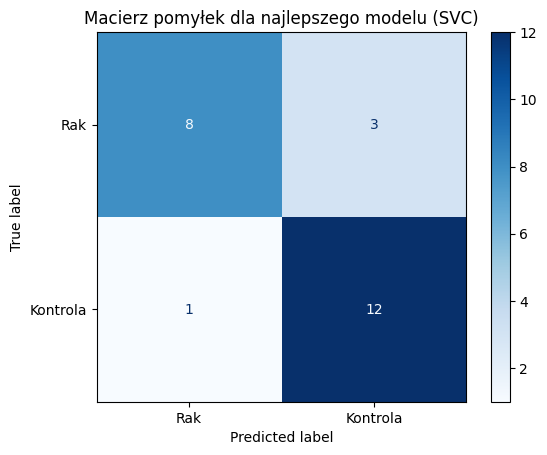

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = SVC(kernel='rbf', C=1.0, gamma=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=[1, 2])  

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rak', 'Kontrola'])
disp.plot(cmap='Blues') 
plt.title("Macierz pomyłek dla najlepszego modelu (SVC)")
plt.grid(False)
plt.show()
